# **Load Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data collection
import yfinance as yf

#Data Scaling
from sklearn.preprocessing import MinMaxScaler

#Random Forest
from sklearn.ensemble import RandomForestRegressor

C:\Users\Thurlo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



# **Load the data**

In [23]:
#Load data (Amazon)

df = pd.read_csv('amazon_stock_data.csv')
df = df.iloc[2000: df.shape[0]]
df

,Date,Open,High,Low,Close,Volume
2000,2005-04-28 00:00:00-04:00,1.583000,1.646000,1.581500,1.626000,289456000
2001,2005-04-29 00:00:00-04:00,1.643000,1.644500,1.576000,1.618000,210470000
2002,2005-05-02 00:00:00-04:00,1.615000,1.664000,1.605000,1.655000,181960000
2003,2005-05-03 00:00:00-04:00,1.647000,1.678000,1.644500,1.660500,135558000
2004,2005-05-04 00:00:00-04:00,1.667500,1.706000,1.663500,1.698000,155132000
...,...,...,...,...,...,...
6893,2024-10-07 00:00:00-04:00,182.949997,183.600006,180.250000,180.800003,42364200
6894,2024-10-08 00:00:00-04:00,181.919998,183.089996,180.919998,182.720001,26372100
6895,2024-10-09 00:00:00-04:00,182.820007,185.850006,182.050003,185.169998,26343100
6896,2024-10-10 00:00:00-04:00,187.130005,188.130005,185.830002,186.649994,27785000


# **Splitting the Dataset**

In [24]:
# Create a new dataframe with only the 'Close column
close = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_len = int(np.ceil( len(dataset) * .9 ))

training_len

4409

In [25]:
# Using Min Max Scalar to scale the data
sc = MinMaxScaler(feature_range=(0,1))

#Scaling the close (closing price) data
sc_close = sc.fit_transform(close)
sc_close

array([[0.00162308],
       [0.00158282],
       [0.00176903],
       ...,
       [0.92536355],
       [0.93281207],
       [0.94373332]])

In [26]:
# Create the training data set
# Create the scaled training data set
train_data = sc_close[0:int(training_len), :]

# creating empty sets
x_train = []
y_train = []

# Split the data into x_train and y_train data sets
for i in range(80, len(train_data)):
    x_train.append(train_data[i-80:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 81:
        print(x_train)
        print(y_train)


[array([0.00162308, 0.00158282, 0.00176903, 0.00179671, 0.00198544,
       0.00198544, 0.00212636, 0.00215656, 0.00205338, 0.00195021,
       0.00195776, 0.00197034, 0.00213139, 0.0021792 , 0.00233019,
       0.00239561, 0.00237297, 0.00241826, 0.00238303, 0.00231006,
       0.00236038, 0.00237297, 0.00237548, 0.00262461, 0.00260196,
       0.00239561, 0.00244091, 0.00233522, 0.00220437, 0.00229747,
       0.00223456, 0.00221443, 0.00225721, 0.00230754, 0.0023931 ,
       0.00232515, 0.00242078, 0.00234277, 0.00230251, 0.00235535,
       0.00225218, 0.00212133, 0.00192253, 0.00183194, 0.00176651,
       0.00172122, 0.00201564, 0.0020106 , 0.00198544, 0.00218172,
       0.00239561, 0.00257679, 0.00262712, 0.00279824, 0.00278817,
       0.00279824, 0.00304484, 0.00304484, 0.00298948, 0.00298948,
       0.00298948, 0.00293664, 0.00442383, 0.00493466, 0.00480129,
       0.00474593, 0.00514352, 0.00504287, 0.0048793 , 0.00483149,
       0.00492963, 0.00499757, 0.00470315, 0.00481639, 0.0045

In [27]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.00162308, 0.00158282, 0.00176903, ..., 0.0045421 , 0.00444396,
        0.00444145],
       [0.00158282, 0.00176903, 0.00179671, ..., 0.00444396, 0.00444145,
        0.00445403],
       [0.00176903, 0.00179671, 0.00198544, ..., 0.00444145, 0.00445403,
        0.00436595],
       ...,
       [0.56883992, 0.57890553, 0.57492961, ..., 0.59646999, 0.60039557,
        0.57553356],
       [0.57890553, 0.57492961, 0.55585529, ..., 0.60039557, 0.57553356,
        0.55187937],
       [0.57492961, 0.55585529, 0.54312231, ..., 0.57553356, 0.55187937,
        0.51388174]])

In [28]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_train.shape

(4329, 80)

# Model  : Random Forest


In [29]:
# Random Forest

# Defining the model
model = RandomForestRegressor(n_estimators=100)

# Fitting the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
# Create the testing data set
test_data = sc_close[training_len - 80: , :]


# Create the empty sets x_test and y_test
x_test = []
y_test = dataset[training_len:, :]

# Populating
for i in range(80, len(test_data)):
    x_test.append(test_data[i-80:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ))
x_test.shape

(489, 80)

In [31]:
# Get the models predicted price values
predictions = model.predict(x_test)

#reshaping the prediction data
predictions = predictions.reshape(-1,1)

# transforming scaled data
predictions = sc.inverse_transform(predictions)

#convert predictions to an array
predictions = np.array(predictions)
predictions.shape


(489, 1)

In [32]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('rmse : ', rmse)

#Mean Square Error
from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test,predictions)
print('mse : ' , mse)

#mean absolute error
mae = np.mean(np.abs(y_test - predictions))
print('mae : ', mae )


rmse :  5.239366623921306
mse :  27.450962619860544
mae :  3.730608732227388


C:\Users\Thurlo\AppData\Local\Temp\ipykernel_22320\891492763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


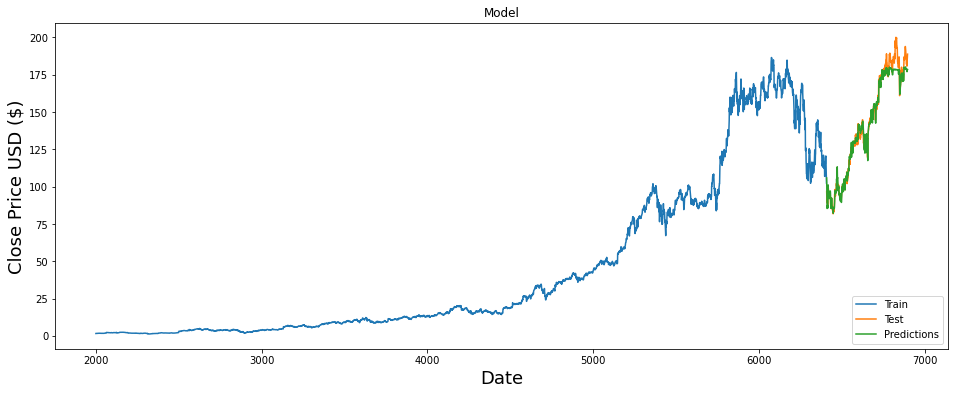

In [34]:
# Plot the data
train = close[:training_len]
valid = close[training_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()